In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
import json

f = open('data.json')
d = json.load(f)

totals = [0 for _ in range(10)]
labels = [x['ngram'] for x in d['Hell']]
for key in ['Hell', 'hell']:
    for i, dat in enumerate(d[key]):
        series = dat['timeseries']
        totals[i] += sum(series)
        
# We'll go in descending order (tenth, ninth, eighth...) because it's easier to draw in that order
totals = totals[::-1]
labels = labels[::-1]

In [62]:
list(zip(labels, normed))

[('tenth circle of Hell', 0.01966756407668084),
 ('ninth circle of Hell', 0.12556716560503067),
 ('eighth circle of Hell', 0.20506072095450795),
 ('seventh circle of Hell', 0.46503786594168905),
 ('sixth circle of Hell', 0.04532200868325168),
 ('fifth circle of Hell', 0.02620467635426357),
 ('fourth circle of Hell', 0.031605370033895415),
 ('third circle of Hell', 0.09710423447473776),
 ('second circle of Hell', 0.1884650073166162),
 ('first circle of Hell', 0.2959653865593269)]

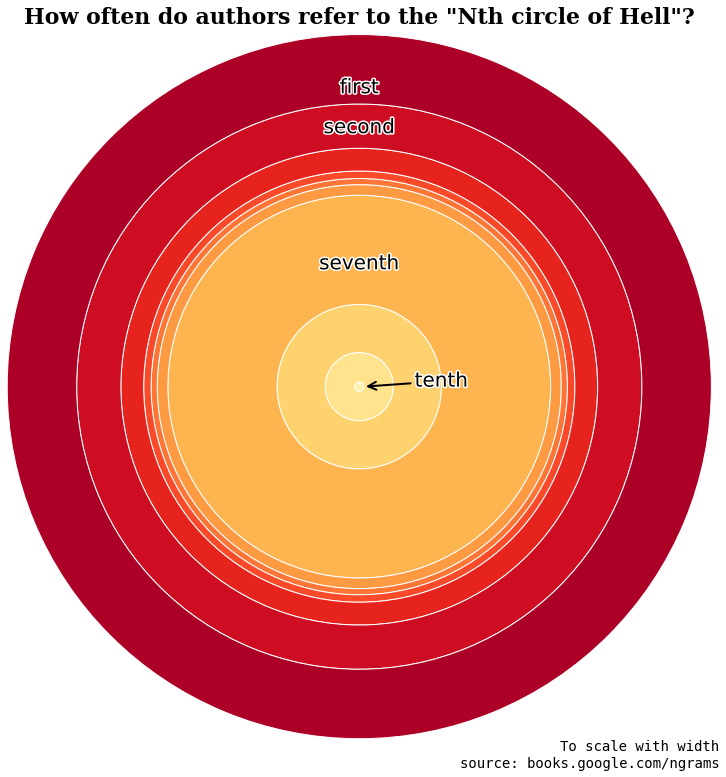

In [146]:
from math import pi, sqrt
import matplotlib.patheffects as PathEffects

# Can be area or width
proportional_to = 'area'
proportional_to = 'width'
assert proportional_to in ('area', 'width')
total_area = pi
scale = 1.5
normed = [x/sum(totals) * scale for x in totals]
areas = [total_area*frac for frac in normed]
n = len(widths)

FS = (10, 11)
fig, ax = plt.subplots(figsize=FS)

cm = 'YlOrRd'
#cm = 'OrRd'
pal = sns.color_palette(cm, n_colors=n).as_hex()

dummy_x = [1]
r = 0
for i in range(n):
    a = areas[i]
    extant = pi*r**2
    total_r = sqrt( (a+extant)/pi )
    if proportional_to == 'area':
        w = total_r - r
        r = total_r
    else:
        w = normed[i]
        total_r = r + w
        r = total_r
    
    col = pal[i]
    ax.pie(dummy_x, radius=total_r, colors=[col],
           wedgeprops=dict(width=w, edgecolor='white',
                           lw=1,
                          ),
          )
fig.set_facecolor('white')

pe = [PathEffects.withStroke(linewidth=3, foreground='white')]
label_kwargs = dict(
            fontsize=20,
            ha='center',
            color='k',
    path_effects=pe
)
ax.annotate('first', 
            xy=(0, 1.15 if proportional_to == 'area' else 1.25),
            **label_kwargs
           )
ax.annotate('second', 
            xy=(0, 1.03 if proportional_to == 'area' else 1.08),
            **label_kwargs
           )
t = ax.annotate('seventh', 
            xy=(0, 0.72 if proportional_to == 'area' else 0.5),
            **label_kwargs
           )
t = ax.annotate('tenth', 
            xy=(0, -0.02) if proportional_to == 'area' else (0.02, 0),
                xytext=None if proportional_to == 'area' else (0.35, 0),
                arrowprops=None if proportional_to == 'area' else dict(
                    arrowstyle='->',
                    lw=2,
                ),
            **label_kwargs
           )

fn = 'FreeSerif'
title = 'How often do authors refer to the "Nth circle of Hell"?'
fig.suptitle(title, fontsize=22,
             fontfamily='serif',
             #fontname=fn, 
             fontweight='bold',
            )
footnote = 'To scale with {}\nsource: books.google.com/ngrams'.format(proportional_to)
fig.text(1.0, .02, footnote, fontsize=14,
         ha='right',
         fontfamily='monospace',
         #fontstyle='italic',
        )
plt.tight_layout();